# Data Cleaning

In [37]:
import pandas as pd

# Load the dataset
file_path = 'world_economics.csv'
df = pd.read_csv(file_path)

# Inspect the dataset for missing or inconsistent data
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             173 non-null    object 
 1   currency         173 non-null    object 
 2   capital          172 non-null    object 
 3   languages        173 non-null    object 
 4   latitude         173 non-null    float64
 5   longitude        173 non-null    float64
 6   area             173 non-null    float64
 7   region           173 non-null    object 
 8   subregion        173 non-null    object 
 9   borders          149 non-null    object 
 10  GDP              173 non-null    int64  
 11  GDP Growth       101 non-null    float64
 12  Interest Rate    162 non-null    float64
 13  Inflation Rate   172 non-null    float64
 14  Jobless Rate     171 non-null    float64
 15  Gov. Budget      166 non-null    float64
 16  Debt/GDP         165 non-null    float64
 17  Current Account 

name              currency           capital   languages  \
0        Tunisia        Tunisian dinar             Tunis      Arabic   
1        Vietnam       Vietnamese đồng             Hanoi  Vietnamese   
2        Ecuador  United States dollar             Quito     Spanish   
3    Puerto Rico  United States dollar          San Juan     English   
4  United States  United States dollar  Washington, D.C.     English   

    latitude   longitude       area    region           subregion  \
0  34.000000    9.000000   163610.0    Africa     Northern Africa   
1  16.166667  107.833333   331212.0      Asia  South-Eastern Asia   
2  -2.000000  -77.500000   276841.0  Americas       South America   
3  18.250000  -66.500000     8870.0  Americas           Caribbean   
4  38.000000  -97.000000  9372610.0  Americas       North America   

                 borders    GDP  GDP Growth  Interest Rate  Inflation Rate  \
0         ['DZA', 'LBY']     53        1.80            7.5            5.30   
1  ['KHM', 'CHN', 'LAO']    476        6.88            4.5            3.19   
2         ['COL', 'PER']    125        3.46            8.5            0.72   
3                    NaN    126         NaN            NaN            1.20   
4         ['CAN', 'MEX']  29185        3.00            4.5            2.70   

   Jobless Rate  Gov. Budget  Debt/GDP  Current Account  Population  
0         15.70         -6.6      79.8             -2.7       11.89  
1          2.24         -4.0      32.9              6.1      101.30  
2          4.50         -1.9      50.6              2.8       17.97  
3          5.70          NaN       NaN              NaN        3.20  
4          4.20         -6.4     124.3             -3.9      341.15

In [1]:
import pandas as pd

# Load the dataset
file_path = 'world_economics.csv'
df = pd.read_csv(file_path)

df.head()

name              currency           capital   languages  \
0        Tunisia        Tunisian dinar             Tunis      Arabic   
1        Vietnam       Vietnamese đồng             Hanoi  Vietnamese   
2        Ecuador  United States dollar             Quito     Spanish   
3    Puerto Rico  United States dollar          San Juan     English   
4  United States  United States dollar  Washington, D.C.     English   

    latitude   longitude       area    region           subregion  \
0  34.000000    9.000000   163610.0    Africa     Northern Africa   
1  16.166667  107.833333   331212.0      Asia  South-Eastern Asia   
2  -2.000000  -77.500000   276841.0  Americas       South America   
3  18.250000  -66.500000     8870.0  Americas           Caribbean   
4  38.000000  -97.000000  9372610.0  Americas       North America   

                 borders    GDP  GDP Growth  Interest Rate  Inflation Rate  \
0         ['DZA', 'LBY']     53        1.80            7.5            5.30   
1  ['KHM', 'CHN', 'LAO']    476        6.88            4.5            3.19   
2         ['COL', 'PER']    125        3.46            8.5            0.72   
3                    NaN    126         NaN            NaN            1.20   
4         ['CAN', 'MEX']  29185        3.00            4.5            2.70   

   Jobless Rate  Gov. Budget  Debt/GDP  Current Account  Population  
0         15.70         -6.6      79.8             -2.7       11.89  
1          2.24         -4.0      32.9              6.1      101.30  
2          4.50         -1.9      50.6              2.8       17.97  
3          5.70          NaN       NaN              NaN        3.20  
4          4.20         -6.4     124.3             -3.9      341.15

In [22]:
# Data Cleaning
# Retain key columns
key_columns = ['name', 'GDP', 'Population', 'Inflation Rate', 'Jobless Rate']
df_cleaned = df[key_columns]

# Handle missing values
# Fill missing GDP with median, Population with mean, Inflation Rate and Jobless Rate with median
fill_values = {
    'GDP': df['GDP'].median(),
    'Population': df['Population'].mean(),
    'Inflation Rate': df['Inflation Rate'].median(),
    'Jobless Rate': df['Jobless Rate'].median()
}
df_cleaned = df_cleaned.fillna(value=fill_values)

df_cleaned.head()

name    GDP  Population  Inflation Rate  Jobless Rate
0        Tunisia     53       11.89            5.30         15.70
1        Vietnam    476      101.30            3.19          2.24
2        Ecuador    125       17.97            0.72          4.50
3    Puerto Rico    126        3.20            1.20          5.70
4  United States  29185      341.15            2.70          4.20

In [25]:
# Exploratory Analysis

# Find the top 10 countries by GDP
top_10_gdp = df.nlargest(10, 'GDP')[['name', 'GDP']]

# Calculate the average GDP and population for each country
average_gdp_population_per_country = df.groupby('name')[['GDP', 'Population']].mean().reset_index()

# Identify the fastest growing economies based on GDP Growth
fastest_growing_economies = df.nlargest(10, 'GDP Growth')[['name', 'GDP Growth']]

# Compare inflation vs unemployment
inflation_vs_unemployment = df.groupby('name')[['Inflation Rate', 'Jobless Rate']].mean().reset_index()

(top_10_gdp, average_gdp_population_per_country, fastest_growing_economies, inflation_vs_unemployment)

(               name    GDP
 4     United States  29185
 108           China  18744
 124         Germany   4660
 152           Japan   4026
 49            India   3913
 6    United Kingdom   3644
 141          France   3162
 79            Italy   2373
 91           Canada   2241
 86           Brazil   2179,
             name    GDP  Population
 0    Afghanistan   17.0       35.70
 1        Albania   27.0        2.36
 2        Algeria  264.0       46.81
 3         Angola   80.0       35.12
 4      Argentina  633.0       47.07
 ..           ...    ...         ...
 168    Venezuela  112.0       34.09
 169      Vietnam  476.0      101.30
 170        Yemen   19.0       40.58
 171       Zambia   26.0       19.70
 172     Zimbabwe   44.0       15.18
 
 [173 rows x 3 columns],
            name  GDP Growth
 57      Algeria       18.60
 104     Nigeria       10.00
 159       Egypt        9.80
 62      Bolivia        7.89
 1       Vietnam        6.88
 44     Mongolia        6.10
 77   Bangladesh 

In [16]:
Prompt for Deepnote Project: Shopping Behaviours Analysis

Title: Customer Shopping Behaviour Analysis – Insights for Retail Strategy

Task for AI:
Create a complete data analysis project on Customer Shopping Behaviours. The dataset should be synthetic or real (public) but under 25MB. The project must include:

Dataset Creation / Loading

If no dataset is available, generate a synthetic dataset (~5,000–10,000 rows) with these columns:

Customer_ID

Age

Gender

Income_Level

Marital_Status

Education_Level

Shopping_Frequency (per month)

Average_Spending (per visit)

Preferred_Payment_Method (Cash, Card, UPI, Wallet)

Product_Category (Clothing, Electronics, Groceries, Beauty, etc.)

Purchase_Time (Morning/Afternoon/Evening/Night)

Data Cleaning & Preprocessing

Handle missing values, duplicates, incorrect data types.

Encode categorical variables (Label/One-hot encoding).

Normalize numerical features where required.

Exploratory Data Analysis (EDA)

Summary statistics.

Age group vs. Average Spending.

Gender vs. Shopping Frequency.

Income Level vs. Preferred Product Category.

Heatmap of correlations (Age, Income, Frequency, Spending).

Time of purchase trends (when people shop the most).

Visualizations (Matplotlib / Seaborn / Plotly)

Bar chart: Product Category preference by Gender.

Histogram: Age distribution of customers.

Pie chart: Payment methods used.

Line chart: Spending trend vs Age/Income.

Heatmap: Correlation matrix.

Customer Segmentation (Clustering)

Use KMeans clustering to group customers into segments based on Age, Income, and Average Spending.

Visualize clusters with a scatter plot.

Insights & Business Recommendations

Identify high-spending vs. low-spending groups.

Suggest marketing strategies (e.g., discounts for youth, premium offers for high-income).

Highlight payment method trends.

Final Output

Well-documented Jupyter Notebook with explanations in markdown.

Dataset size should be <25MB.

Ready to upload on GitHub.import matplotlib.pyplot as plt

# Since 'Year' column does not exist, we cannot plot the GDP trend over time.
# Instead, we can plot the GDP of India as a single data point or find another way to represent the data.

# For demonstration, let's plot the GDP of India as a bar chart
# Ensure that the 'India' entry exists in the DataFrame
df_india = df[df['name'] == 'India']
if not df_india.empty:
    india_gdp = df_india['GDP'].values[0]
    plt.figure(figsize=(6, 4))
    plt.bar(['India'], [india_gdp], color='blue')
    plt.title("India's GDP")
    plt.ylabel('GDP')
    plt.show()
else:
    print("India's GDP data is not available in the dataset.")

KeyError: "['Year'] not in index"

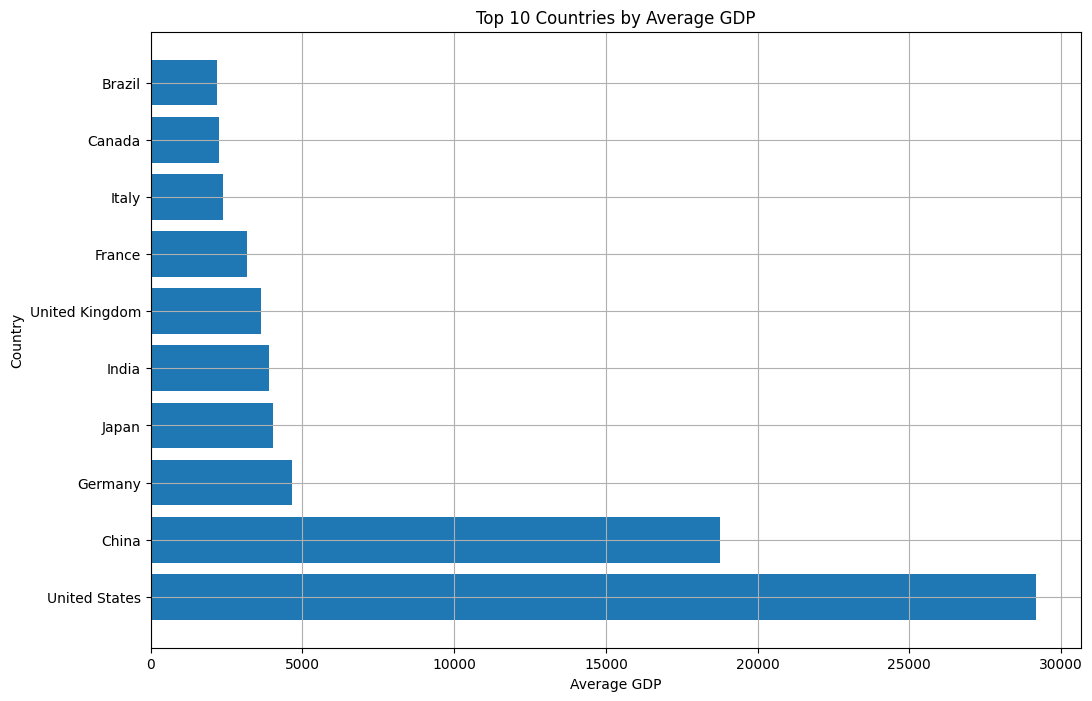

In [19]:
# Bar Chart: Top 10 countries by average GDP
plt.figure(figsize=(12, 8))
plt.barh(average_gdp_per_country.nlargest(10, 'GDP')['name'], average_gdp_per_country.nlargest(10, 'GDP')['GDP'])
plt.title('Top 10 Countries by Average GDP')
plt.xlabel('Average GDP')
plt.ylabel('Country')
plt.grid(True)
plt.show()

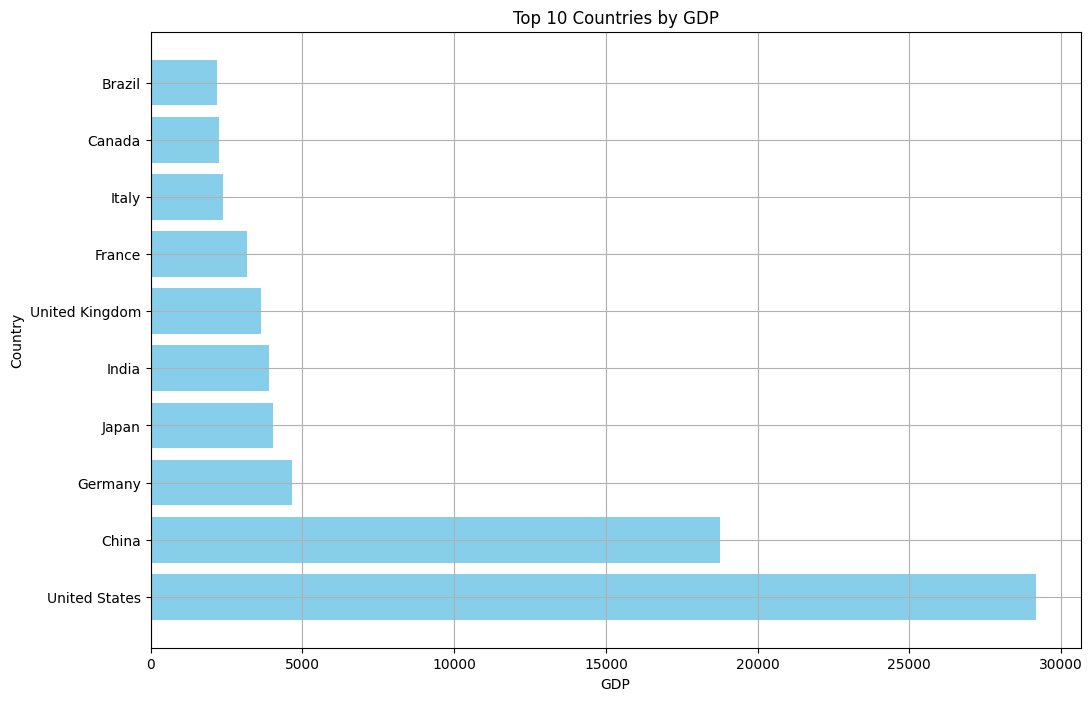

In [28]:
import matplotlib.pyplot as plt

# Bar Chart: Top 10 countries by GDP
plt.figure(figsize=(12, 8))
plt.barh(top_10_gdp['name'], top_10_gdp['GDP'], color='skyblue')
plt.title('Top 10 Countries by GDP')
plt.xlabel('GDP')
plt.ylabel('Country')
plt.grid(True)
plt.show()

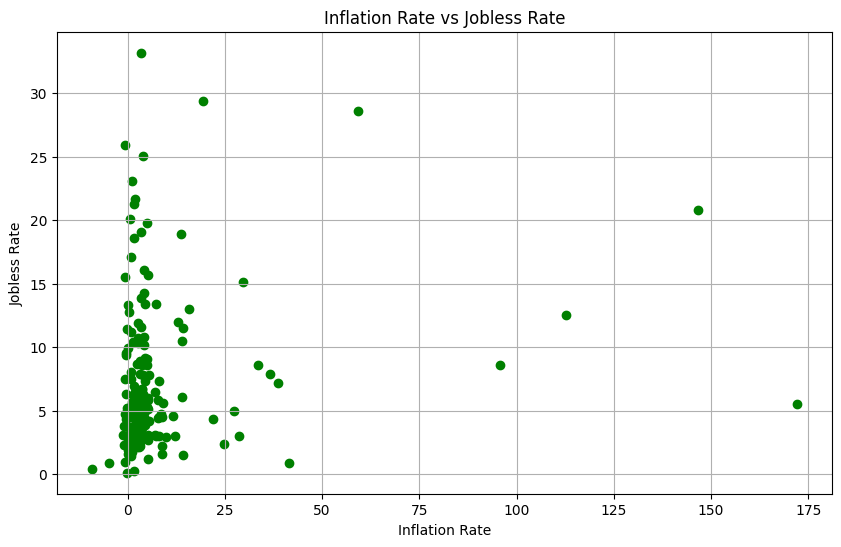

In [31]:
# Scatter Plot: Inflation Rate vs Jobless Rate
plt.figure(figsize=(10, 6))
plt.scatter(inflation_vs_unemployment['Inflation Rate'], inflation_vs_unemployment['Jobless Rate'], color='green')
plt.title('Inflation Rate vs Jobless Rate')
plt.xlabel('Inflation Rate')
plt.ylabel('Jobless Rate')
plt.grid(True)
plt.show()

In [34]:
import seaborn as sns

# Heatmap: Correlation matrix of economic indicators
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Economic Indicators')
plt.show()

ValueError: could not convert string to float: 'Tunisia'

<Figure size 1000x800 with 0 Axes>